# Importing

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math

## Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from potentialEnergy import *
from numberOfCalculations import *
from makeRandomDatabase import *
from prepareDatabaseForMachineLearning import*

# Generating data

If you want to use multiprocessing to speed up the procces you should run runDatabaseGeneration.py instead of this notebook. This notebook is more for playing with the data then actualy generating it.

## Generating data

In [3]:
numberOfDatapoints = 50
numberOfSurroundingCells = 3
numberOfParticlesPerCell = 4
potentialEnergyFunction = potentialEnergyPerSet# Set the potential energy function of the data base as a function
widthOfCell = [1.5, 10]# The width of a singe cell.
filename = 'test2'# Name of the file in which the data will be stored, set to a boolean if you don't want to store the data.

In [4]:
data = makeRandomDatabase(numberOfDatapoints, numberOfSurroundingCells, numberOfParticlesPerCell, potentialEnergyFunction, widthOfCell, filename)

Now generating space.
Done generating space.
Predicted amount of calculations: 3725000 for 50 datapoints.
Assuming 20 us per calculation, estimated time needed: 75 seconds
  2 % done, expected time left 74 seconds, 5 seconds since start.
  4 % done, expected time left 72 seconds, 10 seconds since start.
  6 % done, expected time left 71 seconds, 15 seconds since start.
  8 % done, expected time left 69 seconds, 20 seconds since start.
 10 % done, expected time left 68 seconds, 25 seconds since start.
 12 % done, expected time left 66 seconds, 30 seconds since start.
 14 % done, expected time left 65 seconds, 35 seconds since start.
 16 % done, expected time left 63 seconds, 40 seconds since start.
 18 % done, expected time left 62 seconds, 45 seconds since start.
 20 % done, expected time left 60 seconds, 50 seconds since start.
 22 % done, expected time left 59 seconds, 55 seconds since start.
 24 % done, expected time left 57 seconds, 60 seconds since start.
 26 % done, expected time

## Inspecting file

If no file is saved this part is supposed to crash so don't worry.

In [5]:
dataRead = pd.read_json(filename + '.json', orient='columns')
dataRead['particleCoordinates'] = dataRead['particleCoordinates'].apply(np.array)

"""
data = dataRead
#"""

dataRead.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[2.6360361903, 0.14478004390000002], [0.67351...",3.860411,3,-3.024760e-01
1,"[[5.8213237039, 3.1355917128], [7.593737210000...",7.902657,3,-2.459397e-01
2,"[[0.12013226880000001, 1.0638560275], [1.82255...",2.283687,3,2.728974e+09
3,"[[3.7005384693, 1.3340110672], [1.166137814, 3...",4.277383,3,-1.411984e-01
4,"[[3.6781472099, 0.555844609], [3.5809714434, 5...",7.102725,3,-1.374978e-02


## Merging files

In [9]:
toMerge = ['test1', 'test2']# File names of the things to merge.
toMerge = ['databasemin_cut0.9_widths86_1.5-10_40k_3-1_epoch30_maxDelta0.1_1', 'databasemin_cut0.9_widths86_1.5-10_25k_3-1_epoch30_maxDelta0.1_2']
outputFilename = 'databasemin_cut0.9_widths86_1.5-10_65k_3-1_epoch30_maxDelta0.1_1'
#outputFilename = 'testCombined'

dataFrames = []
for name in toMerge:
    imported = pd.read_json(name + '.json', orient='columns')
    #imported['particleCoordinates'] = imported['particleCoordinates'].apply(np.array)
    dataFrames.append(imported)

total = pd.concat(dataFrames, ignore_index = True, sort = False)
total.to_json(outputFilename + '.json', orient='columns')

## Inspecting data

In [7]:
data.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[0.19961591647720786, 1.7853949914707745], [1...",6.298195,3,-4.516712e-01
1,"[[3.512077239242642, 7.357319472087779], [4.21...",7.939912,3,-2.586147e-01
2,"[[5.854468076664734, 2.117331227286334], [0.95...",8.865106,3,2.769052e+02
3,"[[1.6277477011283732, 1.8857375928348727], [1....",2.305156,3,1.176008e+07
4,"[[3.415098485791713, 2.2903664338503287], [1.4...",7.428395,3,-1.181742e-02


In [8]:
data.describe()

,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,50.000000,50.0,5.000000e+01
mean,5.219370,3.0,7.078757e+13
std,2.268221,0.0,5.005038e+14
min,1.727552,3.0,-2.239718e+00
25%,3.431237,3.0,-1.185046e-01
50%,4.798308,3.0,6.090838e+00
75%,7.298434,3.0,3.948394e+04
max,9.461280,3.0,3.539102e+15


Plotting datapoint  0  with energy  -0.45167121165704016


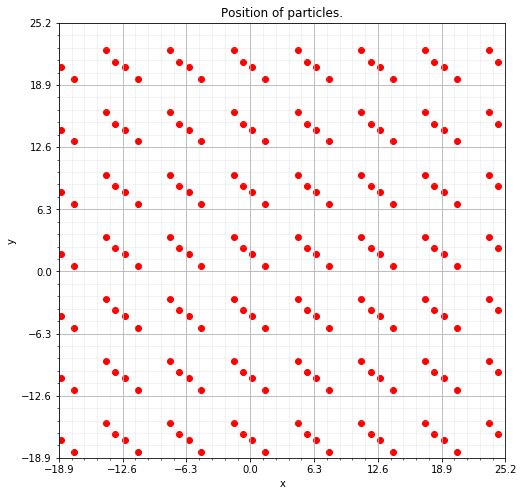

Plotting datapoint  1  with energy  -0.2586146681244714


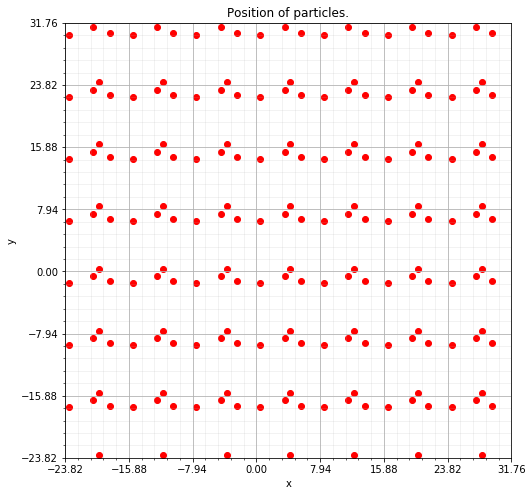

Plotting datapoint  2  with energy  276.90524059450973


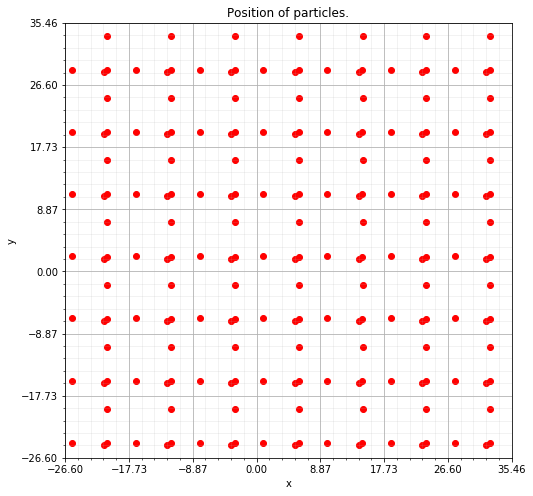

Plotting datapoint  3  with energy  11760081.081649628


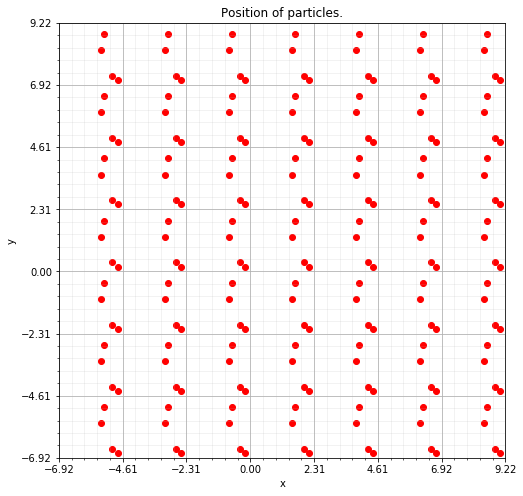

Plotting datapoint  4  with energy  -0.011817422249225565


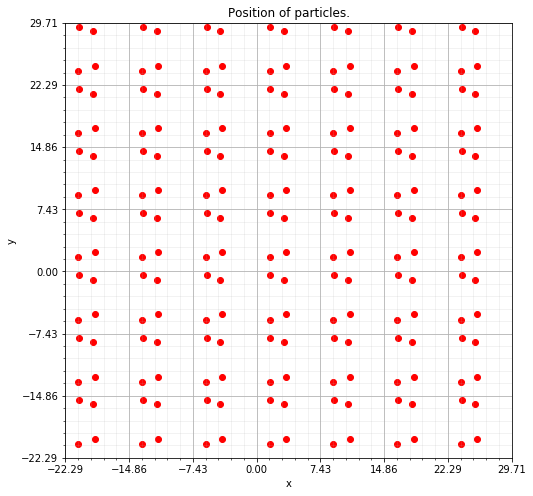

Plotting datapoint  5  with energy  -0.12048927577966614


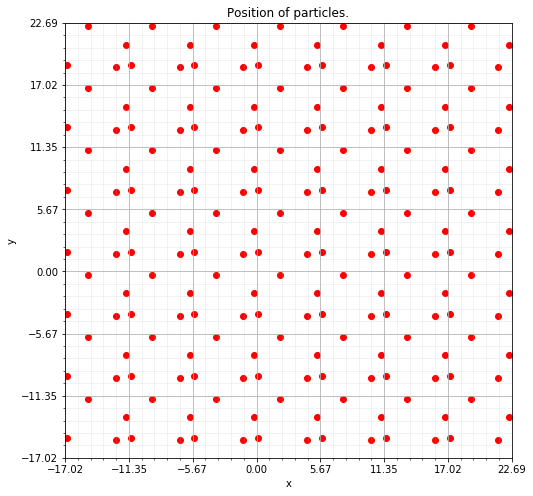

Plotting datapoint  6  with energy  -0.39828412164953425


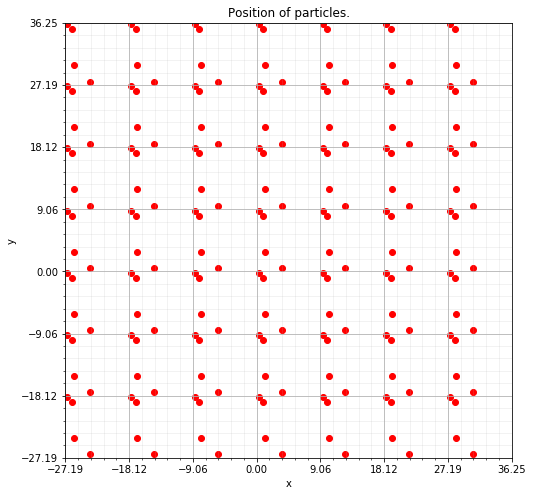

Plotting datapoint  7  with energy  3539102180969133.0


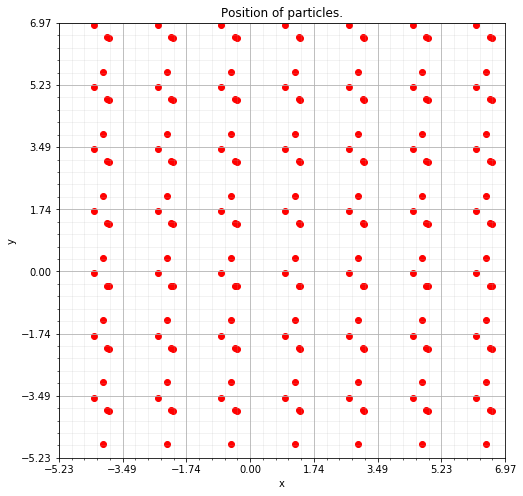

Plotting datapoint  8  with energy  -0.4120607525669446


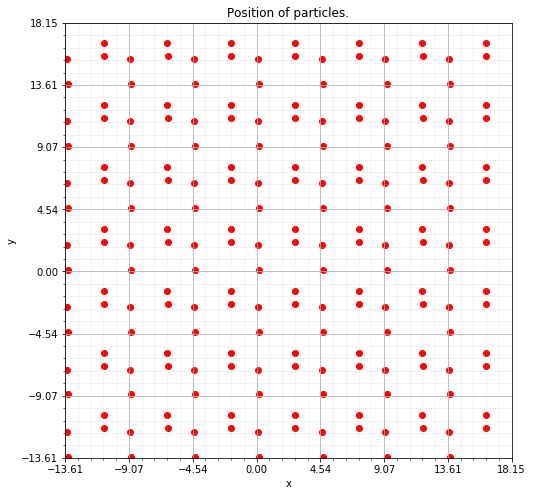

Plotting datapoint  9  with energy  2212708.2629674925


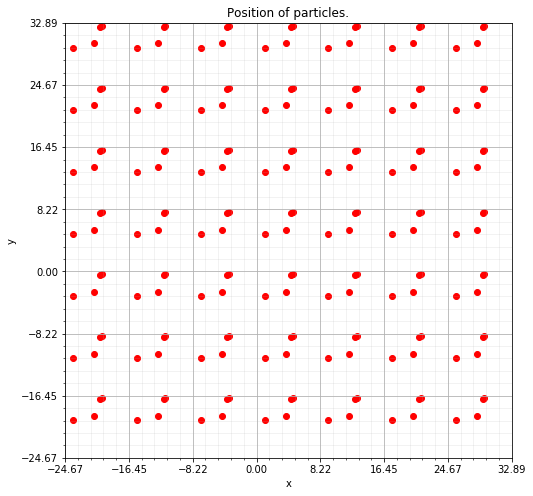

In [9]:
amountToPlot = min([10, numberOfDatapoints])

for i in range(0, amountToPlot):
    print('Plotting datapoint ', i, ' with energy ', data['potentialEnergy'][i])
    plotLatticeFromDataFrame(data, i)

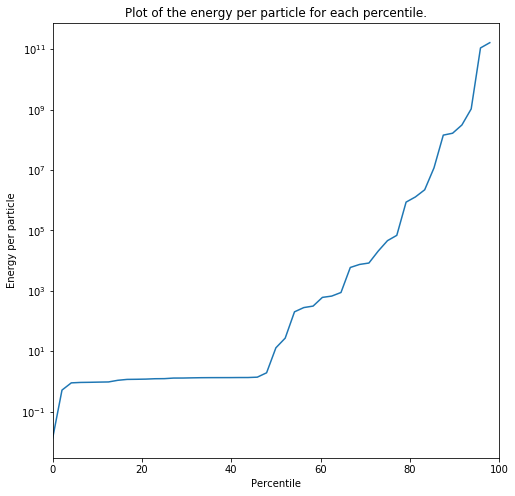

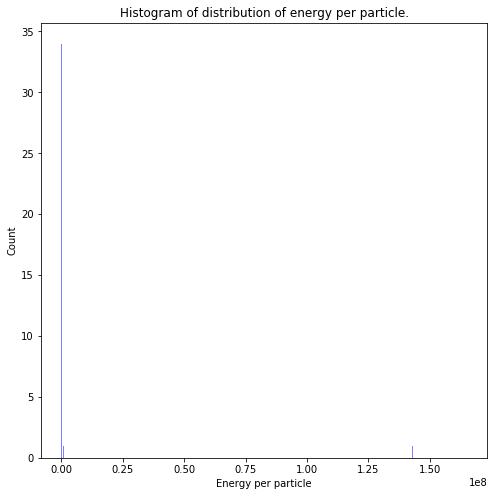

In [10]:
## The code below is for plotting diagrams.
# Filter the data for the percentile plot.
qLow = data['potentialEnergy'].quantile(0.01)
qHi  = data['potentialEnergy'].quantile(0.99)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
#bins = [5**i for i in range(math.floor(math.log(max(min(x), 10**-30)) / math.log(5)) - 4, 26)]

# Make the percentile plot.
fig, ax = plt.subplots(figsize=(8, 8))
sortedX = np.sort(x) + 1.01 * abs(min(x))
ax.plot([100*i/len(x) for i in range(0, len(x))], sortedX)
ax.set_xlim(0, 100)
ax.set_yscale('log')
ax.set_title('Plot of the energy per particle for each percentile.')
ax.set_ylabel('Energy per particle')
ax.set_xlabel('Percentile')
plt.show()

# Filter the data for the normal historgram.
qLow = data['potentialEnergy'].quantile(0.10)
qHi  = data['potentialEnergy'].quantile(0.90)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
numBins = 1000

# Make the normal historgram.
fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, numBins, facecolor='blue', alpha=0.5)
ax.set_title('Histogram of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()

# Prepare database for machine learning

In [11]:
R0 = 20

In [12]:
dataPrepared = prepareDatabseForMachineLearning(data, [-2, -3], R0)

[[ 53.73248134 186.59776642 390.04677601 123.99040565]
 [186.59776642  53.73248134 113.04968629  95.89307094]
 [390.04677601 113.04968629  53.73248134 242.37875177]
 [123.99040565  95.89307094 242.37875177  53.73248134]]
[[ 123.47302708 1602.88120936 6251.25531837  655.02566512]
 [1602.88120936  123.47302708  522.25400982  343.62887814]
 [6251.25531837  522.25400982  123.47302708 2666.68092795]
 [ 655.02566512  343.62887814 2666.68092795  123.47302708]]
  2 % done, expected time left 3 seconds, 1 seconds since start.
[[ 25.28380081 312.31506948 113.65243497  70.538242  ]
 [312.31506948  25.28380081 116.92202022  58.21533251]
 [113.65243497 116.92202022  25.28380081  77.86322207]
 [ 70.538242    58.21533251  77.86322207  25.28380081]]
[[  45.98689083 4891.09647326  848.18552982  315.34158124]
 [4891.09647326   45.98689083  897.27420234  202.65816312]
 [ 848.18552982  897.27420234   45.98689083  391.19851737]
 [ 315.34158124  202.65816312  391.19851737   45.98689083]]
  4 % done, expecte

 [ 310.43523232  333.52920262  354.83072012  194.91749502]]
[[  655.48895911  4212.66059396 23850.59115949  1690.41489566]
 [ 4212.66059396   655.48895911  7796.37605056  2046.04858319]
 [23850.59115949  7796.37605056   655.48895911  2467.1087053 ]
 [ 1690.41489566  2046.04858319  2467.1087053    655.48895911]]
 38 % done, expected time left 2 seconds, 1 seconds since start.
[[ 1779.25496734  3968.49293727  2448.37959543 12303.65837831]
 [ 3968.49293727  1779.25496734  2519.39486932  2977.36390122]
 [ 2448.37959543  2519.39486932  1779.25496734  2458.84553019]
 [12303.65837831  2977.36390122  2458.84553019  1779.25496734]]
[[  11457.70400265  111487.70693974   26064.7272002  1089751.04248316]
 [ 111487.70693974   11457.70400265   28680.40822647   49954.69357921]
 [  26064.7272002    28680.40822647   11457.70400265   26477.93135966]
 [1089751.04248316   49954.69357921   26477.93135966   11457.70400265]]
 40 % done, expected time left 2 seconds, 1 seconds since start.
[[  34.30383542   8

 [ 6984.82930681  8929.78143563  6730.18699974  1791.03851531]]
 78 % done, expected time left 1 seconds, 2 seconds since start.
[[118.79481234 207.22573575 225.07528933 432.1468819 ]
 [207.22573575 118.79481234 226.00684062 204.23246069]
 [225.07528933 226.00684062 118.79481234 458.09708968]
 [432.1468819  204.23246069 458.09708968 118.79481234]]
[[ 345.65152826 1044.05692355 1302.68342835 5787.33852196]
 [1044.05692355  345.65152826 1294.89035541 1010.7889473 ]
 [1302.68342835 1294.89035541  345.65152826 6483.7709977 ]
 [5787.33852196 1010.7889473  6483.7709977   345.65152826]]
 80 % done, expected time left 1 seconds, 2 seconds since start.
[[ 24.66186077  66.09692564  55.68726334  61.20331547]
 [ 66.09692564  24.66186077  72.44720774  97.06369858]
 [ 55.68726334  72.44720774  24.66186077 160.9678019 ]
 [ 61.20331547  97.06369858 160.9678019   24.66186077]]
[[  44.52079992  274.03781417  188.27145282  232.30993825]
 [ 274.03781417   44.52079992  338.35469566  632.71995048]
 [ 188.27

In [13]:
print(dataPrepared['eigenvalues'][0])

dataPrepared.head()

[-366.66830244931725, -68.27278022112175, -12.243788938595658, 662.1147969719872, -6545.664428037125, -575.9064195651255, 130.57581886280906, 7484.887137054284]


,index,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy,eigenvalues,relativeDistances
0,0,"[[0.19961591647720786, 1.7853949914707745], [1...",6.298195,3,-4.516712e-01,"[-366.66830244931725, -68.27278022112175, -12....","[6.298195140969406, 2.1343669501679665, 3.0699..."
1,1,"[[3.512077239242642, 7.357319472087779], [4.21...",7.939912,3,-2.586147e-01,"[-287.3429373286912, -64.72260959164768, 14.21...","[7.9399115499294615, 4.580393245688067, 10.072..."
2,2,"[[5.854468076664734, 2.117331227286334], [0.95...",8.865106,3,2.769052e+02,"[-1160.7040430674951, -20.71871954979643, 46.3...","[8.865105563921064, 0.34406751845580547, 19.27..."
3,3,"[[1.6277477011283732, 1.8857375928348727], [1....",2.305156,3,1.176008e+07,"[-6774.859950788623, -1130.341311639191, 1663....","[2.3051563626403593, 0.05907448833736877, 0.36..."
4,4,"[[3.415098485791713, 2.2903664338503287], [1.4...",7.428395,3,-1.181742e-02,"[-153.30840475850826, -90.35510532302978, 9.35...","[7.428394994984353, 2.8690134742546167, 4.0585..."


[[2517.14783459 3676.52830715 3289.40926616 3676.52830715]
 [3676.52830715 2517.14783459 3676.52830715 3289.40926616]
 [3289.40926616 3676.52830715 2517.14783459 3676.52830715]
 [3676.52830715 3289.40926616 3676.52830715 2517.14783459]]
[[17994.55404945 51840.78588791 35642.36571062 51840.78588791]
 [51840.78588791 17994.55404945 51840.78588791 35642.36571062]
 [35642.36571062 51840.78588791 17994.55404945 51840.78588791]
 [51840.78588791 35642.36571062 51840.78588791 17994.55404945]]
[[2010.38839529 2975.1485224  2652.89600518 2975.1485224 ]
 [2975.1485224  2010.38839529 2975.1485224  2652.89600518]
 [2652.89600518 2975.1485224  2010.38839529 2975.1485224 ]
 [2975.1485224  2652.89600518 2975.1485224  2010.38839529]]
[[13429.55173327 39118.13719447 26818.70704885 39118.13719447]
 [39118.13719447 13429.55173327 39118.13719447 26818.70704885]
 [26818.70704885 39118.13719447 13429.55173327 39118.13719447]
 [39118.13719447 26818.70704885 39118.13719447 13429.55173327]]
[[1633.7742911  2449

[[ 349.32234538 1342.65886319  857.83743948 1342.65886319]
 [1342.65886319  349.32234538 1342.65886319  857.83743948]
 [ 857.83743948 1342.65886319  349.32234538 1342.65886319]
 [1342.65886319  857.83743948 1342.65886319  349.32234538]]
[[110.03124738 214.31938081 178.86887816 214.31938081]
 [214.31938081 110.03124738 214.31938081 178.86887816]
 [178.86887816 214.31938081 110.03124738 214.31938081]
 [214.31938081 178.86887816 214.31938081 110.03124738]]
[[ 312.9187097  1220.26164631  776.81974898 1220.26164631]
 [1220.26164631  312.9187097  1220.26164631  776.81974898]
 [ 776.81974898 1220.26164631  312.9187097  1220.26164631]
 [1220.26164631  776.81974898 1220.26164631  312.9187097 ]]
[[101.25778807 199.63281881 166.11937809 199.63281881]
 [199.63281881 101.25778807 199.63281881 166.11937809]
 [166.11937809 199.63281881 101.25778807 199.63281881]
 [199.63281881 166.11937809 199.63281881 101.25778807]]
[[ 280.95472217 1111.79954474  705.19219637 1111.79954474]
 [1111.79954474  280.9547

C:\Users\heisz\anaconda3\envs\BEPGPU\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.



[[18.29047311 50.88063613 39.41146369 50.88063613]
 [50.88063613 18.29047311 50.88063613 39.41146369]
 [39.41146369 50.88063613 18.29047311 50.88063613]
 [50.88063613 39.41146369 50.88063613 18.29047311]]
[[ 30.05788969 185.17892138 105.46756879 185.17892138]
 [185.17892138  30.05788969 185.17892138 105.46756879]
 [105.46756879 185.17892138  30.05788969 185.17892138]
 [185.17892138 105.46756879 185.17892138  30.05788969]]
[[17.25338945 48.7009692  37.60227278 48.7009692 ]
 [48.7009692  17.25338945 48.7009692  37.60227278]
 [37.60227278 48.7009692  17.25338945 48.7009692 ]
 [48.7009692  37.60227278 48.7009692  17.25338945]]
[[ 27.78338012 174.85751873  99.08118256 174.85751873]
 [174.85751873  27.78338012 174.85751873  99.08118256]
 [ 99.08118256 174.85751873  27.78338012 174.85751873]
 [174.85751873  99.08118256 174.85751873  27.78338012]]
[[16.29241999 46.64144002 35.89555469 46.64144002]
 [46.64144002 16.29241999 46.64144002 35.89555469]
 [35.89555469 46.64144002 16.29241999 46.6414

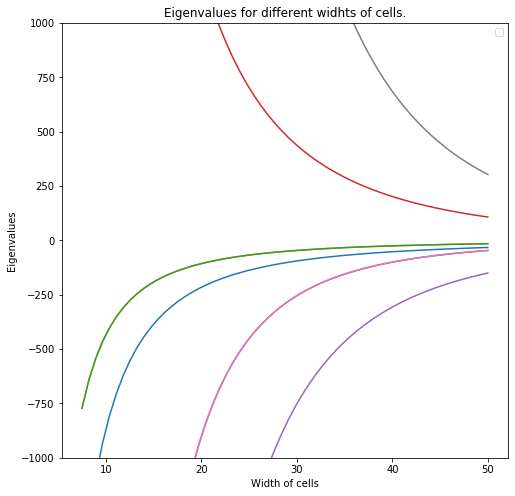

,index,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,60.000000,60.000000,60.0,60.000000
mean,29.500000,5.750000,3.0,-5.951337
std,17.464249,2.516036,0.0,39.065271
min,0.000000,1.500000,3.0,-139.270583
25%,14.750000,3.625000,3.0,-0.043963
50%,29.500000,5.750000,3.0,0.000000
75%,44.250000,7.875000,3.0,0.000000
max,59.000000,10.000000,3.0,196.531045


In [15]:
orderOfMatrix = [-2, -3]
offset = 0
widthOfCell = 5

R0 = 20
x = np.linspace(1.5, 10, 60)

testData = {'particleCoordinates': [],'widthOfCell':[] , 'numberOfSurroundingCells': [], 'potentialEnergy':[]}# Initialy use a dictionary because it's easier to append to than a dataframe.
for i in x:
    particles = [np.array([0.25, 0.75]), np.array([0.25, 0.25]), np.array([0.75, 0.25]), np.array([0.75, 0.75])]
    #particles = [np.array([0.3, 0.5]), np.array([0.3, 0.4]), np.array([0.6, 0.4]), np.array([0.5, i])]
    particles = [i * coordinate for coordinate in particles]
    otherSpace = generateSpace(particles, 2, i)# Generate the other space.
    testData['particleCoordinates'].append(particles)
    testData['widthOfCell'].append(i)
    testData['numberOfSurroundingCells'].append(numberOfSurroundingCells)
    testData['potentialEnergy'].append(potentialEnergy(otherSpace, particles, potentialEnergyPerSet) - offset)# Calculate the potential energy and save it to the data dictonairy.

x = widthOfCell * x
testData = prepareDatabseForMachineLearning(pd.DataFrame(testData), orderOfMatrix, R0, giveUpdates = False)

#for i in range(len(x)):
#    print(testData['eigenvalues'][i])

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), [testData['eigenvalues'][i] for i in range(len(testData['eigenvalues']))])
ax1.legend()
ax1.set_ylim(-1000, 1000)
ax1.set_xlabel('Width of cells')
ax1.set_ylabel('Eigenvalues')
ax1.set_title('Eigenvalues for different widhts of cells.')
plt.show()

testData.head()
testData.describe()


[[107.35726496 198.8572149  176.20022369 226.59543023]
 [198.8572149  107.35726496 388.61276704 486.17043755]
 [176.20022369 388.61276704 107.35726496 211.93165814]
 [226.59543023 486.17043755 211.93165814 107.35726496]]
[[ 303.08695324 1050.04290614  768.98165746 1458.90264221]
 [1050.04290614  303.08695324 4914.97797602 7582.71819123]
 [ 768.98165746 4914.97797602  303.08695324 1229.27321625]
 [1458.90264221 7582.71819123 1229.27321625  303.08695324]]
[[107.35726496 198.8572149  176.20022369 226.41077144]
 [198.8572149  107.35726496 388.61276704 433.28917288]
 [176.20022369 388.61276704 107.35726496 209.19009168]
 [226.41077144 433.28917288 209.19009168 107.35726496]]
[[ 303.08695324 1050.04290614  768.98165746 1456.09391538]
 [1050.04290614  303.08695324 4914.97797602 6088.2889336 ]
 [ 768.98165746 4914.97797602  303.08695324 1186.21928647]
 [1456.09391538 6088.2889336  1186.21928647  303.08695324]]
[[107.35726496 198.8572149  176.20022369 225.86108139]
 [198.8572149  107.35726496 3

 [186.97184172 211.16819054 373.41245456 107.35726496]]
[[ 303.08695324 1050.04290614  768.98165746  902.74985609]
 [1050.04290614  303.08695324 4914.97797602 1210.23870989]
 [ 768.98165746 4914.97797602  303.08695324 4540.59563065]
 [ 902.74985609 1210.23870989 4540.59563065  303.08695324]]
[[107.35726496 198.8572149  176.20022369 185.19344629]
 [198.8572149  107.35726496 388.61276704 213.68022184]
 [176.20022369 388.61276704 107.35726496 408.56873134]
 [185.19344629 213.68022184 408.56873134 107.35726496]]
[[ 303.08695324 1050.04290614  768.98165746  880.03435068]
 [1050.04290614  303.08695324 4914.97797602 1250.04518298]
 [ 768.98165746 4914.97797602  303.08695324 5433.31662229]
 [ 880.03435068 1250.04518298 5433.31662229  303.08695324]]
[[107.35726496 198.8572149  176.20022369 183.59255234]
 [198.8572149  107.35726496 388.61276704 217.17273997]
 [176.20022369 388.61276704 107.35726496 451.02626723]
 [183.59255234 217.17273997 451.02626723 107.35726496]]
[[ 303.08695324 1050.0429061

[[ 107.35726496  198.8572149   176.20022369  191.01985237]
 [ 198.8572149   107.35726496  388.61276704 1288.10630506]
 [ 176.20022369  388.61276704  107.35726496  703.20291011]
 [ 191.01985237 1288.10630506  703.20291011  107.35726496]]
[[  303.08695324  1050.04290614   768.98165746   955.18481074]
 [ 1050.04290614   303.08695324  4914.97797602 40818.26205971]
 [  768.98165746  4914.97797602   303.08695324 14772.92534643]
 [  955.18481074 40818.26205971 14772.92534643   303.08695324]]
[[ 107.35726496  198.8572149   176.20022369  193.26343016]
 [ 198.8572149   107.35726496  388.61276704 1664.60227331]
 [ 176.20022369  388.61276704  107.35726496  615.20350372]
 [ 193.26343016 1664.60227331  615.20350372  107.35726496]]
[[  303.08695324  1050.04290614   768.98165746   984.68249774]
 [ 1050.04290614   303.08695324  4914.97797602 61703.8529201 ]
 [  768.98165746  4914.97797602   303.08695324 11668.09210343]
 [  984.68249774 61703.8529201  11668.09210343   303.08695324]]
[[ 107.35726496  198

No handles with labels found to put in legend.



[[ 107.35726496  198.8572149   176.20022369  220.37210225]
 [ 198.8572149   107.35726496  388.61276704 1421.89979216]
 [ 176.20022369  388.61276704  107.35726496  251.09537437]
 [ 220.37210225 1421.89979216  251.09537437  107.35726496]]
[[  303.08695324  1050.04290614   768.98165746  1365.32329352]
 [ 1050.04290614   303.08695324  4914.97797602 47908.84773142]
 [  768.98165746  4914.97797602   303.08695324  1898.08840869]
 [ 1365.32329352 47908.84773142  1898.08840869   303.08695324]]
[[ 107.35726496  198.8572149   176.20022369  222.18484954]
 [ 198.8572149   107.35726496  388.61276704 1120.60392416]
 [ 176.20022369  388.61276704  107.35726496  241.20814458]
 [ 222.18484954 1120.60392416  241.20814458  107.35726496]]
[[  303.08695324  1050.04290614   768.98165746  1392.3480987 ]
 [ 1050.04290614   303.08695324  4914.97797602 32494.55586606]
 [  768.98165746  4914.97797602   303.08695324  1720.10112589]
 [ 1392.3480987  32494.55586606  1720.10112589   303.08695324]]
[[107.35726496 198.

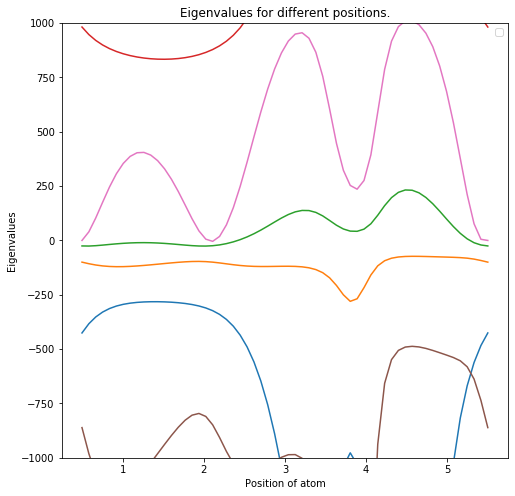

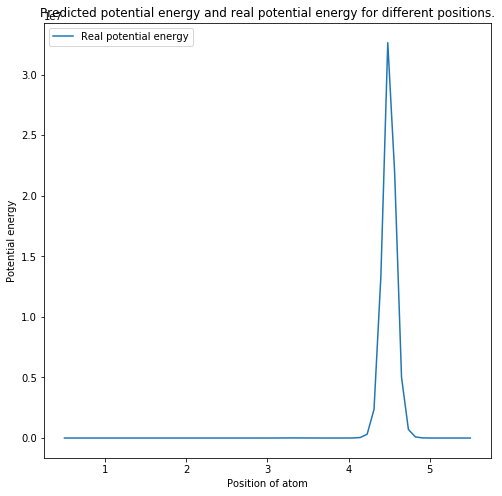

In [18]:
widthOfCell = 5.0
numberOfSurroundingCells = 3
R0 = 20
x = np.linspace(0.1, 1.1, 60)

testData = {'particleCoordinates': [],'widthOfCell':[] , 'numberOfSurroundingCells': [], 'potentialEnergy':[]}# Initialy use a dictionary because it's easier to append to than a dataframe.
for i in x:
    particles = [np.array([0.1, 0.1]), np.array([0.55, 0.9]), np.array([0.6, 0.665]), np.array([0.5, i])]
    #particles = [np.array([0.3, 0.5]), np.array([0.3, 0.4]), np.array([0.6, 0.4]), np.array([0.5, i])]
    particles = [widthOfCell * coordinate for coordinate in particles]
    otherSpace = generateSpace(particles, numberOfSurroundingCells, widthOfCell)# Generate the other space.
    testData['particleCoordinates'].append(particles)
    testData['widthOfCell'].append(widthOfCell)
    testData['numberOfSurroundingCells'].append(numberOfSurroundingCells)
    testData['potentialEnergy'].append(potentialEnergy(otherSpace, particles, potentialEnergyPerSet) - offset)# Calculate the potential energy and save it to the data dictonairy.

x = widthOfCell * x
testData = prepareDatabseForMachineLearning(pd.DataFrame(testData), orderOfMatrix, R0, giveUpdates = False)

#for i in range(len(x)):
#    print(testData['eigenvalues'][i])

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), [testData['eigenvalues'][i] for i in range(len(testData['eigenvalues']))])
ax1.legend()
ax1.set_ylim(-1000, 1000)
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Eigenvalues')
ax1.set_title('Eigenvalues for different positions.')
plt.show()

testData.head()
testData.describe()

y = [[],[]]
for i in range(len(x)):
    y[1].append(testData['potentialEnergy'][i])


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), y[1], label='Real potential energy')
ax1.legend()
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Potential energy')
ax1.set_title('Predicted potential energy and real potential energy for different positions.')
#ax1.set_ylim(-0.75 * offset , 1.5 * max(y[1]))
plt.show()


## Testing

In [35]:
filename = 'testPrepared'
#filename = 'databaseModLen_min_cut0.90_widths86_Width5_data1k_3-1sur_epoch30_maxDelta0.1_1Prepared'
orderOfMatrix = [-2, -3, -4]# Make a list if you want to do the calculations yourself and make a other type of you want to import it
inputSize = 19#4 * len(orderOfMatrix)

data = pd.read_json(filename + '.json', orient='columns')
data['particleCoordinates'] = data['particleCoordinates'].apply(np.array)
data['eigenvalues'] = data['eigenvalues'].apply(np.array)

data['topEigenvalues'] = [max(data['eigenvalues'][i]) for i in data.index]

data.head()

,index,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy,eigenvalues,relativeDistances,topEigenvalues
0,360,"[[2.7719439147, 4.8022058029], [2.9997687749, ...",6.0,3,-2.316633,"[-493.7258162086, -299.9897051422, 5.464246561...","[6.0, 0.8886853669, 0.9170847716, 1.3350096503...",1037.764361
1,361,"[[0.10751359020000001, 4.6913043322], [3.87671...",6.0,3,-0.877279,"[-456.8875492529, -96.5097571149, -3.018300947...","[6.0, 0.9917178503, 9.3696371276, 14.838101185...",805.928694
2,362,"[[3.927225397, 4.5425882379], [2.8876345836, 0...",6.0,3,-3.135808,"[-558.1896826533, -344.8377075988, 3.154684290...","[6.0, 0.8611932593, 1.0261233904, 1.7555007260...",1149.385792
3,363,"[[5.7584642514, 2.941310245], [1.7710141361, 0...",6.0,3,-0.603488,"[-414.1716736335, -124.7984072856, 51.88139969...","[6.0, 1.0046968314, 2.0629860876, 4.9220111477...",736.601768
4,364,"[[4.428524033, 3.03910178], [1.4610674465, 2.4...",6.0,3,-1.316042,"[-537.2211159739, -120.2459123915, 5.387148342...","[6.0, 0.948338121, 0.9511419054, 3.5278948194,...",901.592966


In [36]:
data = data.sort_values(by=['topEigenvalues'], ascending=False)
data.head()

,index,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy,eigenvalues,relativeDistances,topEigenvalues
955,235,"[[0.31369859, 1.3503449463], [0.45584139700000...",1.5,3,89726.356223,"[-3080.8229142123, -1268.8019408007, 97.670388...","[1.5, 0.5134050827000001, 0.6961429312, 0.7733...",14320.545805
356,716,"[[0.7296127344000001, 0.8414543938], [0.111539...",1.5,3,27868.670089,"[-2677.6265625456, -1020.7432876468, -393.5165...","[1.5, 0.4339642355, 0.4418064632, 0.5490036213...",14160.477767
954,234,"[[0.8089254333, 1.3760904840000001], [0.310179...",1.5,3,7666.115503,"[-2070.155867615, -1262.1637580425, -602.86833...","[1.5, 0.4069773062, 0.4370027447, 0.4450374032...",14003.779304
2761,2402,"[[0.6646477098, 0.0011622828], [1.2897980628, ...",1.5,3,5224.884135,"[-1906.5564333023, -1241.0278595172, -785.7724...","[1.5, 0.3926481022, 0.42722967980000004, 0.445...",14001.948130
726,6,"[[0.1001018759, 1.2009534585], [0.3463798433, ...",1.5,3,39890.760886,"[-2705.4093484776, -1110.4298189354, -110.6708...","[1.5, 0.6215430697000001, 0.6517889011, 0.6800...",13995.101383


In [37]:
data['relativeDistances'][data.index[1]]

[1.5,
 0.4339642355,
 0.4418064632,
 0.5490036213,
 1.2654370834,
 1.3845050739,
 1.5879415403000001]